In [442]:
from collections.abc import Sequence
import json
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

EPSILON = 1e-3

plt.style.use("seaborn-v0_8-deep")
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Liberation Serif"]
plt.rcParams["font.size"] = 18

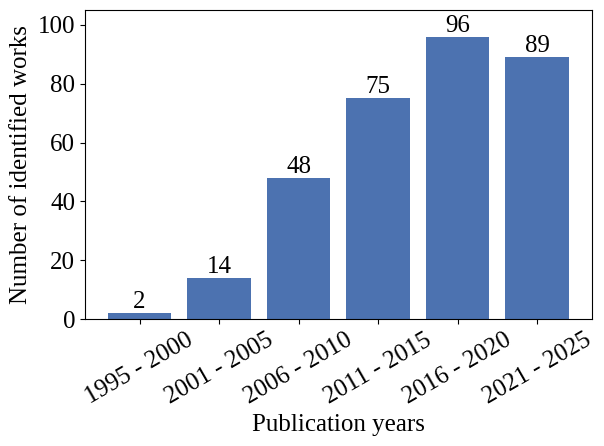

In [443]:
plt.clf()
plt.xlabel("Publication years")
plt.ylabel("Number of identified works")
plt.ylim(0, 105)
plt.xticks(rotation=30)
b = plt.bar(
    x=["1995 - 2000", "2001 - 2005", "2006 - 2010", "2011 - 2015", "2016 - 2020", "2021 - 2025"],
    height=[2, 14, 48, 75, 96, 89]
)
plt.bar_label(b)
plt.tight_layout()
plt.savefig("./out/sr-per-year.pdf", metadata={"CreationDate": None, "ModDate": None})

In [444]:
def rq_boxplot(
    *,
    input: str,
    output: str | None = None,
    ais: Sequence[int],
    xlabel: str = "Approaches",
    ylabel: str = "[TODO] Metric",
    tlabel: Sequence[str],
    baseline: int = 0,
    negative: bool = False,
) -> None:
    if output is None:
        output = input
    assert len(ais) == len(tlabel)

    BC = mcolors.to_rgba("C1", alpha=0.25)
    PC = mcolors.to_rgba("C4", alpha=0.25)

    with Path.open(f"../tcp-framework/out/{input}.json", "r") as f:
        data = json.load(f)
    values = [[sum(ds[ai]) / len(ds[ai]) for ds in data.values()] for ai in ais]

    plt.clf()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    bp = plt.boxplot(values, tick_labels=tlabel, patch_artist=True, medianprops={"color": "C2", "linewidth": 2})
    for bi, box in enumerate(bp["boxes"]):
        box.set_facecolor(BC if bi < baseline else PC)
    if negative:
        plt.axhline(color="black", linestyle="dotted")
    plt.tight_layout()
    plt.savefig(f"./out/{output}.pdf", metadata={"CreationDate": None, "ModDate": None})


def rq_table(
    *,
    input: str,
    ais: Sequence[int],
    xlabel: str = "Approaches",
    tlabel: Sequence[str],
    subsequent: bool = False,
) -> None:
    assert len(ais) == len(tlabel)

    AM = " & "
    def sp(count: int = 4) -> str:
        return " " * count
    def bf(content: str) -> str:
        return r"\textbf{" + content + r"}"
    def tt(content: str) -> str:
        return r"\texttt{" + content + r"}"
    def fmt(number: float) -> str:
        out = f"{number:.3f}"
        if out.startswith("0."):
            out = out[1:]
        return out
    def ds(content: str) -> str:
        return content if not subsequent else ""
    def cells(values: Sequence[float]) -> str:
        return AM.join((fmt(v) if v + EPSILON < max(values) else bf(fmt(v))) for v in values)

    with Path.open(f"../tcp-framework/out/{input}.json", "r") as f:
        data = json.load(f)
    rows = [[sum(ap) / len(ap) for ap in ds] for ds in data.values()]

    print(r"\begin{tabular}{" + ds("l ") + " ".join(["r"] * len(ais)) + r"}")
    print(sp() + r"\toprule")
    print(sp() + ds(r"\multirow{2}{*}{" + bf("Subject program") + r"} & ") + r"\multicolumn{" + str(len(ais)) + r"}{c}{" + bf(xlabel) + r"} \\")
    print(sp() + ds(AM) + AM.join([bf(v) for v in tlabel]) + r" \\ \midrule")
    for d, row in zip(data.keys(), rows, strict=True):
        values = [v for i, v in enumerate(row) if i in ais]
        print(sp() + ds(tt(d) + AM) + cells(values) + r" \\")
    print(sp() + r"\midrule")
    means = [sum(row[i] for row in rows) / len(rows) for i in ais]
    print(sp() + ds(bf("Mean") + AM) + cells(means) + r"\\")
    medians = [sorted([row[i] for row in rows])[len(rows) // 2] for i in ais]
    print(sp() + ds(bf("Median") + AM) + cells(medians) + r"\\")
    print(sp() + r"\bottomrule")
    print(r"\end{tabular}")


def rq(
    *,
    input: str,
    output: str | None = None,
    ais: Sequence[int],
    xlabel: str = "Approaches",
    ylabel: str = "[TODO] Metric",
    tlabel: Sequence[str],
    baseline: int = 0,
    negative: bool = False,
    subsequent: bool = False,
) -> None:
    rq_boxplot(
        input=input,
        output=output,
        ais=ais,
        xlabel=xlabel,
        ylabel=ylabel,
        tlabel=tlabel,
        baseline=baseline,
        negative=negative,
    )
    rq_table(
        input=input,
        ais=ais,
        xlabel=xlabel,
        tlabel=tlabel,
        subsequent=subsequent,
    )

\begin{tabular}{l r r r}
    \toprule
    \multirow{2}{*}{\textbf{Subject program}} & \multicolumn{3}{c}{\textbf{RQ1.1: Normalization}} \\
     & \textbf{None} & \textbf{Formatting} & \textbf{Identifiers} \\ \midrule
    \texttt{LittleProxy} & .481 & .524 & \textbf{.556} \\
    \texttt{HikariCP} & .289 & .334 & \textbf{.384} \\
    \texttt{jade4j} & .452 & \textbf{.671} & .498 \\
    \texttt{wicket-bootstrap} & .725 & \textbf{.731} & .532 \\
    \texttt{titan} & .111 & .170 & \textbf{.328} \\
    \texttt{dynjs} & .481 & .415 & \textbf{.532} \\
    \texttt{jsprit} & .539 & \textbf{.556} & .533 \\
    \texttt{DSpace} & \textbf{.433} & .345 & .406 \\
    \texttt{optiq} & .444 & .419 & \textbf{.522} \\
    \texttt{cloudify} & .447 & \textbf{.453} & .413 \\
    \texttt{okhttp} & .315 & \textbf{.316} & .312 \\
    \midrule
    \textbf{Mean} & .429 & .449 & \textbf{.456}\\
    \textbf{Median} & .447 & .419 & \textbf{.498}\\
    \bottomrule
\end{tabular}


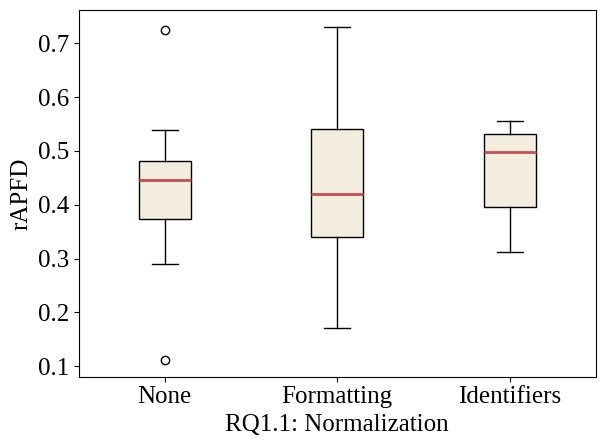

In [445]:
rq(
    input="rq11",
    ais=range(3),
    xlabel="RQ1.1: Normalization",
    ylabel="rAPFD",
    tlabel=["None", "Formatting", "Identifiers"]
)

\begin{tabular}{r r}
    \toprule
    \multicolumn{2}{c}{\textbf{RQ1.2: Distance}} \\
    \textbf{Manhattan} & \textbf{Euclidean} \\ \midrule
    \textbf{.567} & .556 \\
    .339 & \textbf{.384} \\
    .476 & \textbf{.498} \\
    .529 & \textbf{.532} \\
    \textbf{.339} & .328 \\
    \textbf{.534} & .532 \\
    \textbf{.548} & .533 \\
    .302 & \textbf{.406} \\
    .492 & \textbf{.522} \\
    \textbf{.420} & .413 \\
    .295 & \textbf{.312} \\
    \midrule
    .440 & \textbf{.456}\\
    .476 & \textbf{.498}\\
    \bottomrule
\end{tabular}


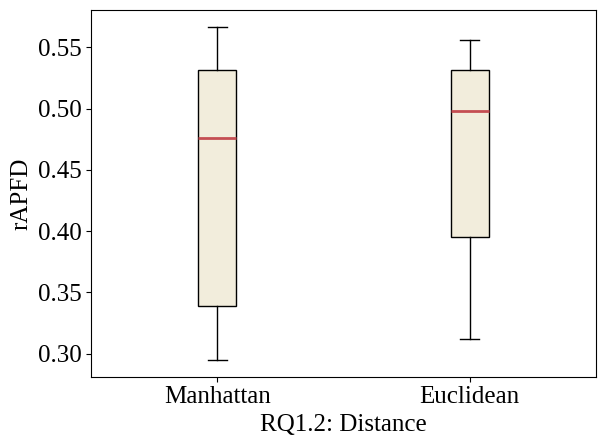

In [446]:
rq(
    input="rq12",
    ais=range(2),
    xlabel="RQ1.2: Distance",
    ylabel="rAPFD",
    tlabel=["Manhattan", "Euclidean"],
    subsequent=True
)

\begin{tabular}{r r r}
    \toprule
    \multicolumn{3}{c}{\textbf{RQ1.3: Aggregation}} \\
    \textbf{Min} & \textbf{Average} & \textbf{Max} \\ \midrule
    .556 & .500 & \textbf{.642} \\
    .384 & .376 & \textbf{.429} \\
    \textbf{.498} & .477 & .415 \\
    .532 & \textbf{.534} & .380 \\
    .328 & .390 & \textbf{.719} \\
    .532 & \textbf{.536} & .328 \\
    .533 & \textbf{.584} & .512 \\
    \textbf{.406} & .282 & .362 \\
    \textbf{.522} & .416 & .455 \\
    \textbf{.413} & .340 & .252 \\
    .312 & .437 & \textbf{.469} \\
    \midrule
    \textbf{.456} & .443 & .451\\
    \textbf{.498} & .437 & .429\\
    \bottomrule
\end{tabular}


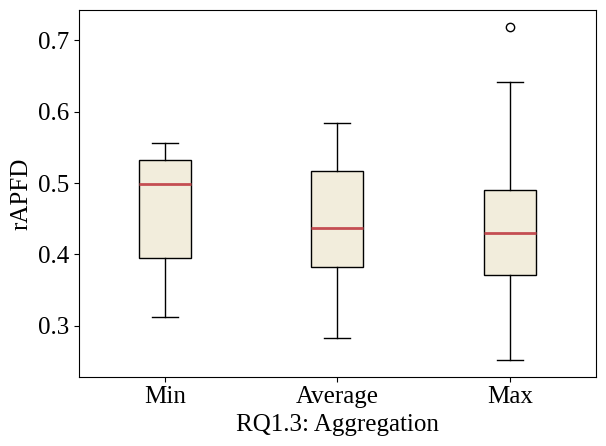

In [447]:
rq(
    input="rq13",
    ais=range(3),
    xlabel="RQ1.3: Aggregation",
    ylabel="rAPFD",
    tlabel=["Min", "Average", "Max"],
    subsequent=True
)

\begin{tabular}{l r r r r r r}
    \toprule
    \multirow{2}{*}{\textbf{Subject program}} & \multicolumn{6}{c}{\textbf{RQ2.1: Approaches}} \\
     & \textbf{FoldFails} & \textbf{Recent} & \textbf{ExeTime} & \textbf{Borda} & \textbf{Random} & \textbf{Schulze} \\ \midrule
    \texttt{LittleProxy} & \textbf{.697} & .375 & .501 & .619 & .562 & .608 \\
    \texttt{HikariCP} & .749 & .530 & .662 & \textbf{.854} & .710 & \textbf{.854} \\
    \texttt{jade4j} & .661 & .805 & .633 & \textbf{.849} & .637 & .674 \\
    \texttt{wicket-bootstrap} & .748 & .727 & .497 & \textbf{.847} & .733 & \textbf{.847} \\
    \texttt{titan} & \textbf{.896} & .431 & .313 & .861 & .839 & .861 \\
    \texttt{dynjs} & .840 & .533 & .808 & \textbf{.879} & .762 & \textbf{.879} \\
    \texttt{jsprit} & .872 & .623 & .626 & \textbf{.975} & .922 & \textbf{.975} \\
    \texttt{DSpace} & \textbf{.738} & .482 & .662 & .704 & .610 & .704 \\
    \texttt{optiq} & .870 & .216 & .697 & \textbf{.886} & .840 & \textbf{.886} \\
    

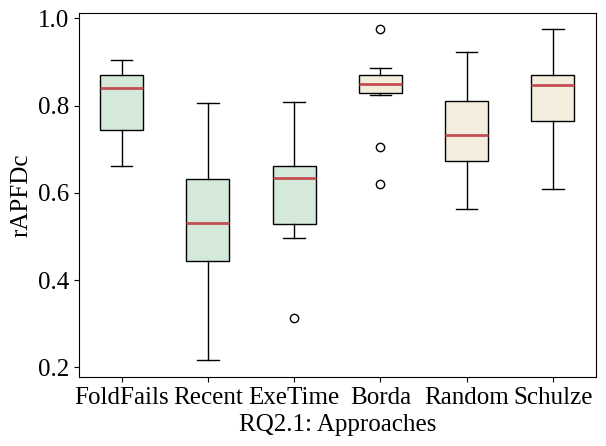

In [448]:
rq(
    input="rq21",
    ais=range(6),
    xlabel="RQ2.1: Approaches",
    ylabel="rAPFDc",
    tlabel=["FoldFails", "Recent", "ExeTime", "Borda", "Random", "Schulze"],
    baseline=3,
)

\begin{tabular}{l r r r r}
    \toprule
    \multirow{2}{*}{\textbf{Subject program}} & \multicolumn{4}{c}{\textbf{RQ2.2: Approaches}} \\
     & \textbf{ExeTime} & \textbf{Recent} & \textbf{FailDensity} & \textbf{Interpolated} \\ \midrule
    \texttt{LittleProxy} & .501 & .375 & .688 & \textbf{.691} \\
    \texttt{HikariCP} & .662 & .530 & \textbf{.780} & \textbf{.780} \\
    \texttt{jade4j} & .633 & .805 & \textbf{.886} & .885 \\
    \texttt{wicket-bootstrap} & .497 & .727 & .747 & \textbf{.785} \\
    \texttt{titan} & .313 & .431 & .907 & \textbf{.930} \\
    \texttt{dynjs} & .808 & .533 & \textbf{.843} & .824 \\
    \texttt{jsprit} & .626 & .623 & .872 & \textbf{.896} \\
    \texttt{DSpace} & .662 & .482 & .738 & \textbf{.791} \\
    \texttt{optiq} & .697 & .216 & .870 & \textbf{.911} \\
    \texttt{cloudify} & .641 & .639 & .855 & \textbf{.868} \\
    \texttt{okhttp} & .556 & .456 & .903 & \textbf{.908} \\
    \midrule
    \textbf{Mean} & .599 & .529 & .826 & \textbf{.843}\\
    \t

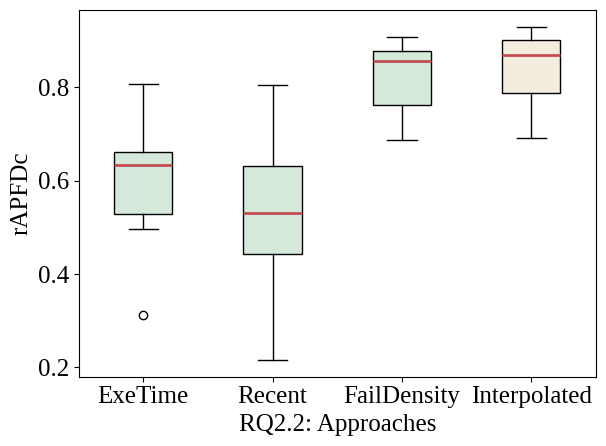

In [449]:
rq(
    input="rq22",
    ais=range(4),
    xlabel="RQ2.2: Approaches",
    ylabel="rAPFDc",
    tlabel=["ExeTime", "Recent", "FailDensity", "Interpolated"],
    baseline=3,
)

\begin{tabular}{l r r r}
    \toprule
    \multirow{2}{*}{\textbf{Subject program}} & \multicolumn{3}{c}{\textbf{RQ2.3: ExeTime breaking}} \\
     & \textbf{TotalFails} & \textbf{ExeTime} & \textbf{Breaked} \\ \midrule
    \texttt{LittleProxy} & .678 & .501 & \textbf{.709} \\
    \texttt{HikariCP} & .583 & \textbf{.662} & .594 \\
    \texttt{jade4j} & .606 & \textbf{.633} & .616 \\
    \texttt{wicket-bootstrap} & .744 & .497 & \textbf{.905} \\
    \texttt{titan} & .888 & .313 & \textbf{.901} \\
    \texttt{dynjs} & .835 & .808 & \textbf{.948} \\
    \texttt{jsprit} & .819 & .626 & \textbf{.897} \\
    \texttt{DSpace} & .739 & .662 & \textbf{.819} \\
    \texttt{optiq} & .852 & .697 & \textbf{.940} \\
    \texttt{cloudify} & .767 & .641 & \textbf{.809} \\
    \texttt{okhttp} & .865 & .556 & \textbf{.884} \\
    \midrule
    \textbf{Mean} & .761 & .599 & \textbf{.820}\\
    \textbf{Median} & .767 & .633 & \textbf{.884}\\
    \bottomrule
\end{tabular}


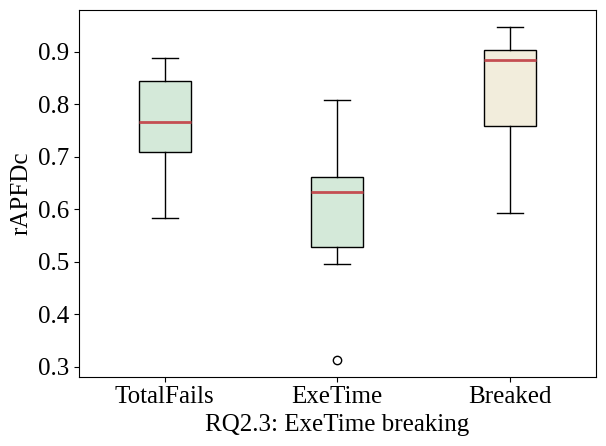

In [450]:
rq(
    input="rq23",
    output="rq23-exe",
    ais=[0, 1, 3],
    xlabel="RQ2.3: ExeTime breaking",
    ylabel="rAPFDc",
    tlabel=["TotalFails", "ExeTime", "Breaked"],
    baseline=2,
)

\begin{tabular}{r r r}
    \toprule
    \multicolumn{3}{c}{\textbf{RQ2.3: CodeDist breaking}} \\
    \textbf{TotalFails} & \textbf{CodeDist} & \textbf{Breaked} \\ \midrule
    .678 & .614 & \textbf{.679} \\
    \textbf{.583} & .450 & .579 \\
    .606 & .379 & \textbf{.615} \\
    .744 & .557 & \textbf{.811} \\
    .888 & .505 & \textbf{.915} \\
    .835 & .397 & \textbf{.920} \\
    .819 & .604 & \textbf{.847} \\
    .739 & .427 & \textbf{.818} \\
    .852 & .703 & \textbf{.915} \\
    .767 & .358 & \textbf{.804} \\
    .865 & .368 & \textbf{.878} \\
    \midrule
    .761 & .488 & \textbf{.798}\\
    .767 & .450 & \textbf{.818}\\
    \bottomrule
\end{tabular}


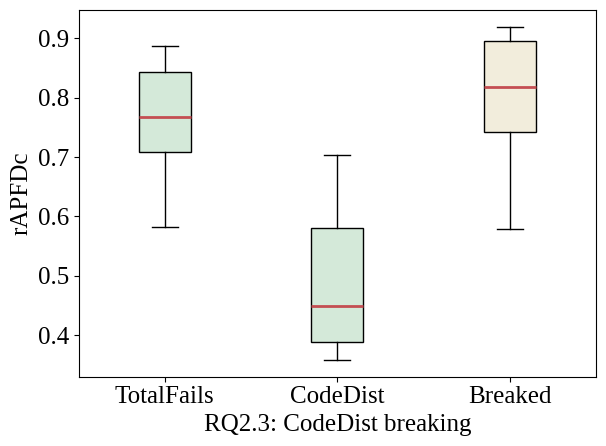

In [451]:
rq(
    input="rq23",
    output="rq23-code",
    ais=[0, 2, 4],
    ylabel="rAPFDc",
    xlabel="RQ2.3: CodeDist breaking",
    tlabel=["TotalFails", "CodeDist", "Breaked"],
    baseline=2,
    subsequent=True
)

\begin{tabular}{l r r r r r r}
    \toprule
    \multirow{2}{*}{\textbf{Subject program}} & \multicolumn{6}{c}{\textbf{RQ3.1: Approaches}} \\
     & \textbf{B1} & \textbf{B2} & \textbf{B3} & \textbf{P1} & \textbf{P2} & \textbf{P3} \\ \midrule
    \texttt{LittleProxy} & .558 & .659 & .688 & .619 & .691 & \textbf{.709} \\
    \texttt{HikariCP} & .446 & .744 & .780 & \textbf{.854} & .780 & .594 \\
    \texttt{jade4j} & .566 & .661 & \textbf{.886} & .849 & .885 & .616 \\
    \texttt{wicket-bootstrap} & .514 & .892 & .747 & .847 & .785 & \textbf{.905} \\
    \texttt{titan} & .520 & .916 & .907 & .861 & \textbf{.930} & .901 \\
    \texttt{dynjs} & .494 & .871 & .843 & .879 & .824 & \textbf{.948} \\
    \texttt{jsprit} & .573 & .913 & .872 & \textbf{.975} & .896 & .897 \\
    \texttt{DSpace} & .592 & .658 & .738 & .704 & .791 & \textbf{.819} \\
    \texttt{optiq} & .457 & .836 & .870 & .886 & .911 & \textbf{.940} \\
    \texttt{cloudify} & .443 & .849 & .855 & .825 & \textbf{.868} & .809 \\
 

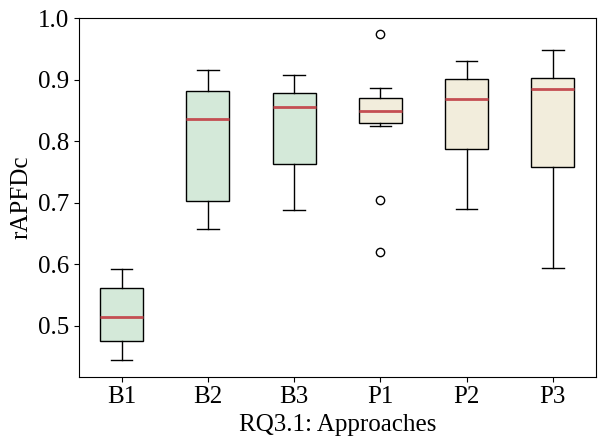

In [452]:
rq(
    input="rq3-rapfdc",
    ais=range(6),
    ylabel="rAPFDc",
    xlabel="RQ3.1: Approaches",
    tlabel=["B1", "B2", "B3", "P1", "P2", "P3"],
    baseline=3,
)

\begin{tabular}{l r r r r r r}
    \toprule
    \multirow{2}{*}{\textbf{Subject program}} & \multicolumn{6}{c}{\textbf{RQ3.1: Approaches}} \\
     & \textbf{B1} & \textbf{B2} & \textbf{B3} & \textbf{P1} & \textbf{P2} & \textbf{P3} \\ \midrule
    \texttt{LittleProxy} & .440 & .521 & .568 & .541 & \textbf{.600} & .564 \\
    \texttt{HikariCP} & .608 & .634 & .637 & \textbf{.803} & .637 & .590 \\
    \texttt{jade4j} & .807 & .750 & .916 & .891 & \textbf{.917} & .630 \\
    \texttt{wicket-bootstrap} & .472 & .807 & .713 & .763 & .747 & \textbf{.831} \\
    \texttt{titan} & .558 & .779 & .778 & .710 & \textbf{.816} & .760 \\
    \texttt{dynjs} & .590 & .928 & .881 & .916 & .859 & \textbf{.966} \\
    \texttt{jsprit} & .585 & .824 & .764 & \textbf{.898} & .783 & .784 \\
    \texttt{DSpace} & .553 & .556 & .570 & .539 & \textbf{.654} & .613 \\
    \texttt{optiq} & .474 & .817 & .872 & .779 & \textbf{.889} & .882 \\
    \texttt{cloudify} & .389 & .662 & .649 & .589 & \textbf{.667} & .531 \\
 

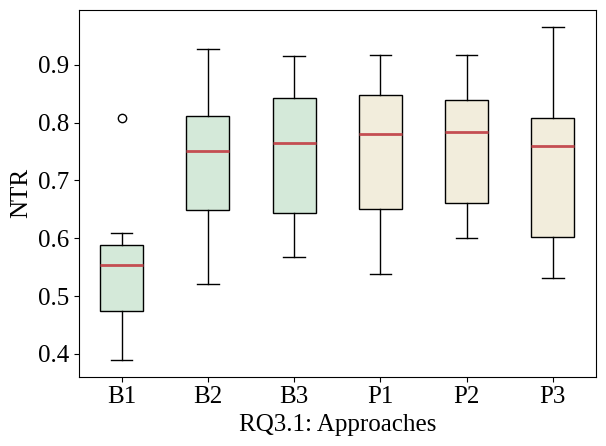

In [453]:
rq(
    input="rq3-ntr",
    ais=range(6),
    ylabel="NTR",
    xlabel="RQ3.1: Approaches",
    tlabel=["B1", "B2", "B3", "P1", "P2", "P3"],
    baseline=3,
)

\begin{tabular}{l r r r r r r}
    \toprule
    \multirow{2}{*}{\textbf{Subject program}} & \multicolumn{6}{c}{\textbf{RQ3.1: Approaches}} \\
     & \textbf{B1} & \textbf{B2} & \textbf{B3} & \textbf{P1} & \textbf{P2} & \textbf{P3} \\ \midrule
    \texttt{LittleProxy} & .000 & .009 & .015 & .012 & \textbf{.018} & .014 \\
    \texttt{HikariCP} & -0.006 & -0.004 & -0.004 & \textbf{.012} & -0.004 & -0.008 \\
    \texttt{jade4j} & .019 & .015 & \textbf{.028} & .026 & \textbf{.028} & .005 \\
    \texttt{wicket-bootstrap} & .012 & \textbf{.021} & .019 & .020 & .020 & \textbf{.022} \\
    \texttt{titan} & .006 & .022 & .022 & .017 & \textbf{.024} & .020 \\
    \texttt{dynjs} & .001 & \textbf{.005} & .005 & \textbf{.005} & .005 & \textbf{.006} \\
    \texttt{jsprit} & .009 & .021 & .018 & \textbf{.025} & .019 & .019 \\
    \texttt{DSpace} & .003 & .003 & \textbf{.003} & .003 & \textbf{.004} & \textbf{.004} \\
    \texttt{optiq} & .003 & \textbf{.008} & \textbf{.009} & .007 & \textbf{.009} & \te

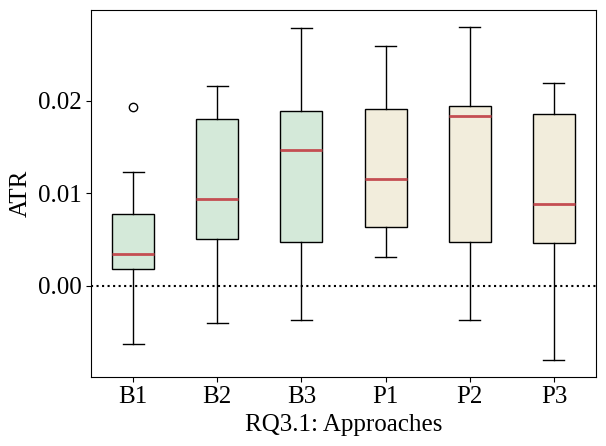

In [454]:
rq(
    input="rq3-atr",
    ais=range(6),
    ylabel="ATR",
    xlabel="RQ3.1: Approaches",
    tlabel=["B1", "B2", "B3", "P1", "P2", "P3"],
    baseline=3,
    negative=True,
)